# Cube de données W43-MM1 N2H+ 7M+12M isolated contsub crop

In [2]:
%pylab inline
from pywavan import fbm2d, powspec, fan_trans
from astropy.io import fits
import aplpy
from pywavan import subfits
from pywavan import nb_scale

Populating the interactive namespace from numpy and matplotlib


In [ ]:
HDU = fits.open("/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_7M12M_n2hp.image-isolated-contsub-crop.fits")
cube = HDU[0].data
header = HDU[0].header

In [ ]:
cube.shape

INFO: Auto-setting vmin to -1.081e-02 [aplpy.core]
INFO: Auto-setting vmax to  2.285e-02 [aplpy.core]


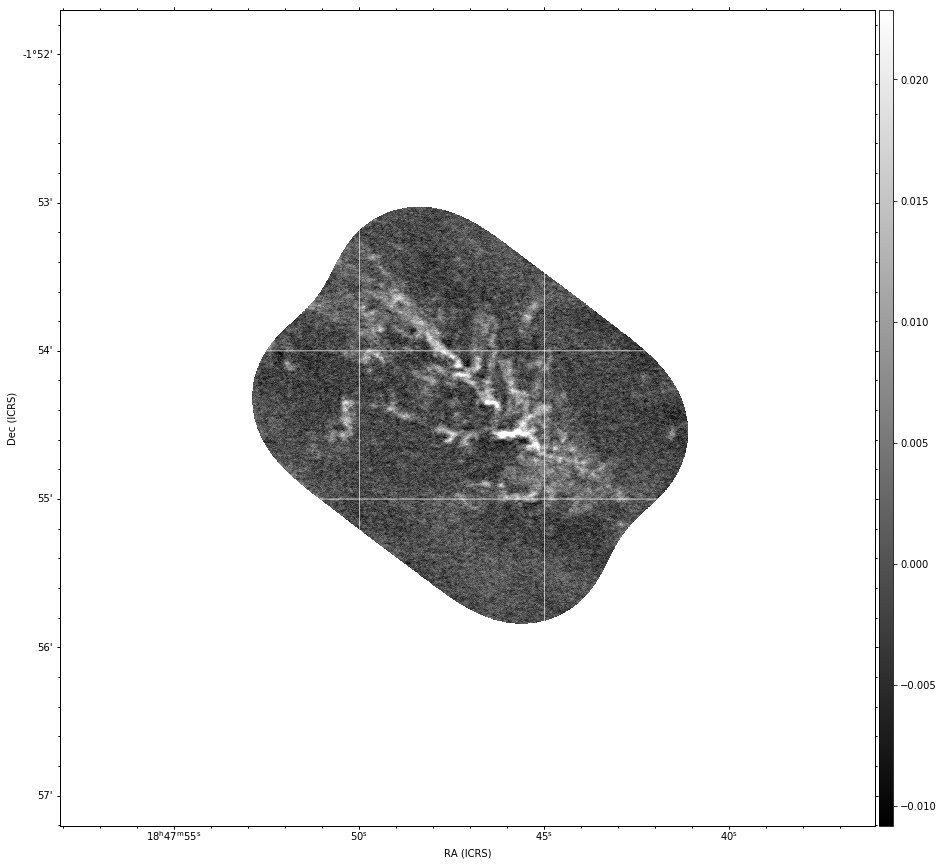

In [4]:
fig_all = plt.figure(1, figsize=(15,15))
fig = aplpy.FITSFigure("/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_7M12M_n2hp.image-isolated-contsub-crop.fits",figure=fig_all,slices=[35])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.add_grid()

***
# Cut du cube d'origine

In [15]:
input1 = '/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_7M12M_n2hp.image-isolated-contsub-crop.fits'
output = '/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_7M12M_n2hp.image-isolated-contsub-crop_cut.fits'
coord = np.array([1036,1165,9,2034,1801,56])
subfits(input1,output,coord)

Dimensions 999 637 48


In [4]:
HDU = fits.open("/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_7M12M_n2hp.image-isolated-contsub-crop_cut.fits")
cube = HDU[0].data
header = HDU[0].header

INFO: Auto-setting vmin to -1.022e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.883e-02 [aplpy.core]


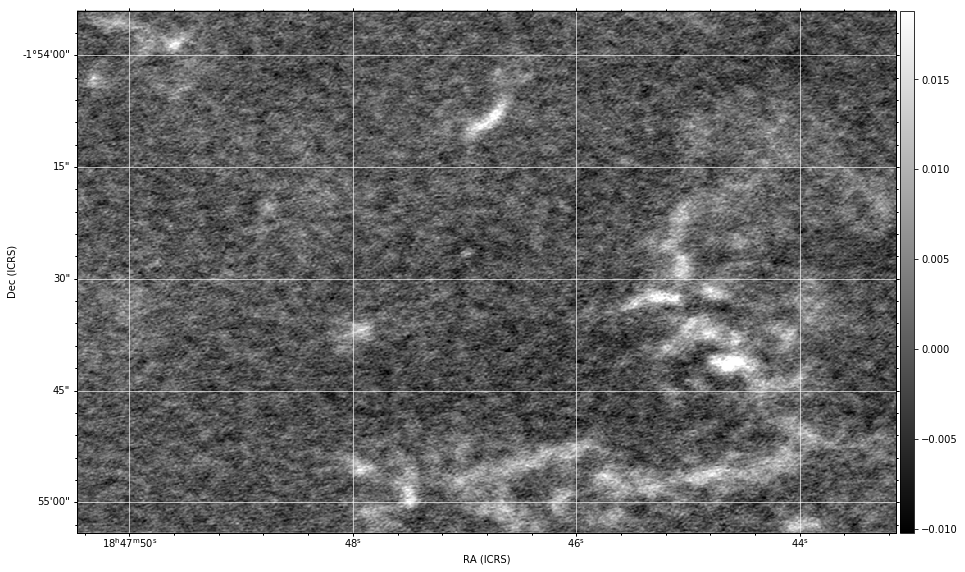

In [5]:
fig_all = plt.figure(1, figsize=(15,15))
fig = aplpy.FITSFigure("/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_7M12M_n2hp.image-isolated-contsub-crop_cut.fits",figure=fig_all,slices=[15])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.add_grid()

***
# Test de vérification de pywavan 

In [6]:
cube.shape

(48, 637, 999)

In [7]:
reso = header ['CDELT2']*60
q = []
q= [2.0]*nb_scale((48, 1024,1400))

wt, S11a, wave_k, S1a, q =  fan_trans(cube[23,:,:], reso=reso, angular=False,q=q,  apodize = 0.98,arrdim = np.array([1024,1400]))

  0%|          | 0/25 [00:00<?, ?it/s]

1400 1024


100%|██████████| 25/25 [02:36<00:00,  6.25s/it]


In [8]:
M = nb_scale((48, 1024,1400))

coherent = np.sum(wt[M:2*M,:,:],axis=0)
Gaussian = np.sum(wt[2*M:3*M,:,:],axis=0) 

Text(0.5, 1.0, 'coherent')

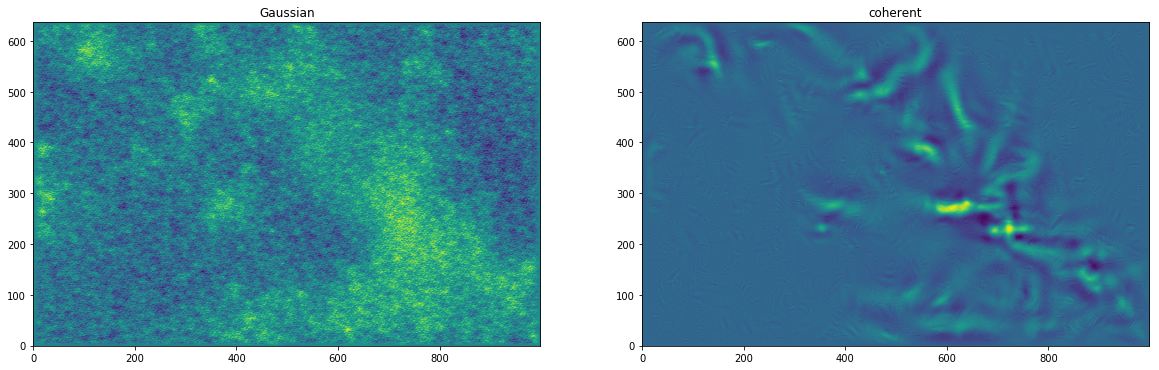

In [9]:
figure(figsize=(20,10))
subplot(1,2,1)
imshow(Gaussian.real,origin="lower")
title('Gaussian')
subplot(1,2,2)
imshow(coherent.real,origin="lower")
title('coherent') 

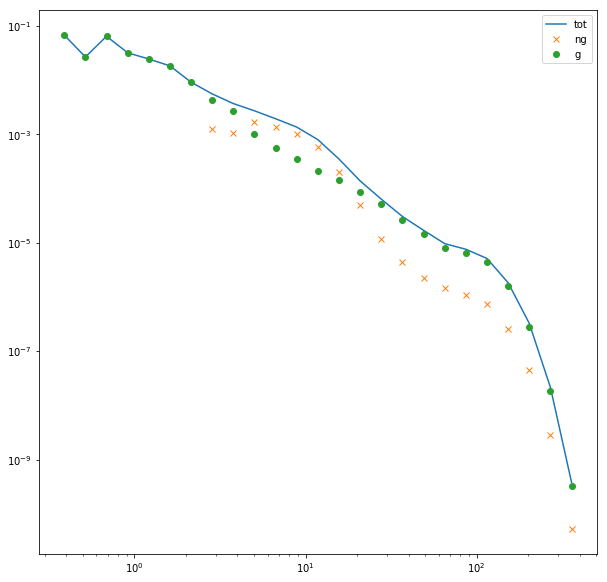

In [12]:
figure(figsize=(10,10))
plt.plot(wave_k, S1a[0,:],label="tot")
plt.plot(wave_k, S1a[1,:],"x",label="ng")
plt.plot(wave_k, S1a[2,:],"o",label="g")
plt.xscale("log")
plt.yscale("log")
plt.legend()

***
# Pywavan sur tout le cube

In [23]:
reso = header ['CDELT2']*60
M = nb_scale((48, 1024,1400))
N = header['NAXIS3']

In [ ]:
coherent_tot = []
gaussian_tot = []
s1a_tot_tot = []
s1a_tot_gau = []
s1a_tot_ng = []

for i in range(N) :
    q = []
    q= [2.0]*nb_scale((48, 1024,1400))
    print("data number",i)
    wt, S11a, wave_k, S1a, q =  fan_trans(cube[i,:,:], reso=reso, angular=False,q=q,apodize = 0.98, arrdim = np.array([1024,1400]))

    coherent = np.sum(wt[M:2*M,:,:],axis=0)
    Gaussian = np.sum(wt[2*M:3*M,:,:],axis=0) 
    
    coherent_tot.append( coherent )
    gaussian_tot.append( Gaussian )
    s1a_tot_tot.append( S1a[0,:] )
    s1a_tot_ng.append(S1a[1,:])
    s1a_tot_gau.append(S1a[2,:])

np.save("/user/workdir/soldanof/data/w43_7_12_iso_cnts/coh.npy", coherent_tot)
np.save("/user/workdir/soldanof/data/w43_7_12_iso_cnts/gau.npy", gaussian_tot)
np.save("/user/workdir/soldanof/data/w43_7_12_iso_cnts/s1at.npy",s1a_tot_tot)
np.save("/user/workdir/soldanof/data/w43_7_12_iso_cnts/s1ag.npy",s1a_tot_gau)
np.save("/user/workdir/soldanof/data/w43_7_12_iso_cnts/s1ang.npy",s1a_tot_ng)
np.save("/user/workdir/soldanof/data/w43_7_12_iso_cnts/wave_k.npy",wave_k)

  0%|          | 0/25 [00:00<?, ?it/s]

data number 0
1400 1024


  0%|          | 0/25 [00:00<?, ?it/s]

data number 1
1400 1024


  0%|          | 0/25 [00:00<?, ?it/s]

data number 2
1400 1024


  0%|          | 0/25 [00:00<?, ?it/s]

data number 3
1400 1024


 20%|██        | 5/25 [00:15<01:02,  3.14s/it]

Text(0.5, 1.0, 'Coherent')

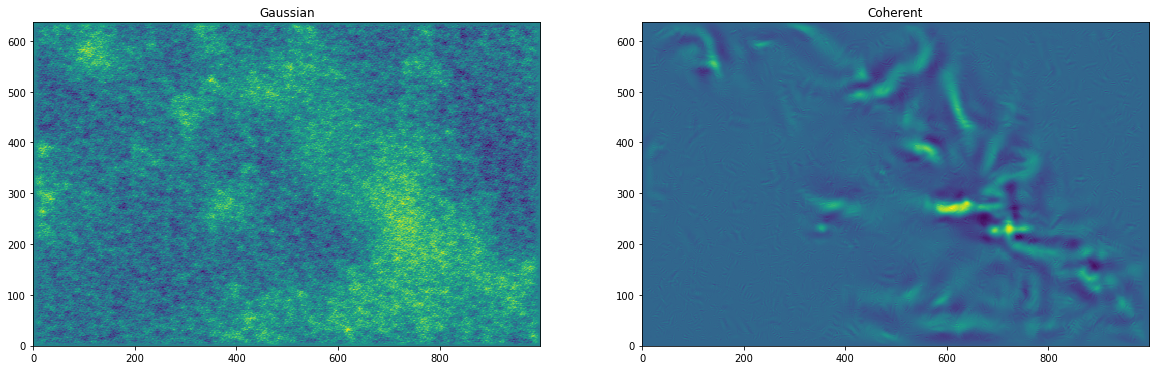

In [44]:
figure(figsize=(20,10))
im_g = np.load("/user/workdir/soldanof/data/w43_7_12_iso_cnts/gau.npy")
im_ng = np.load("/user/workdir/soldanof/data/w43_7_12_iso_cnts/coh.npy")

subplot(1,2,1)
imshow(im_g[23].real,origin="lower")
title('Gaussian')

subplot(1,2,2)
imshow(im_ng[23].real,origin="lower")
title('Coherent')

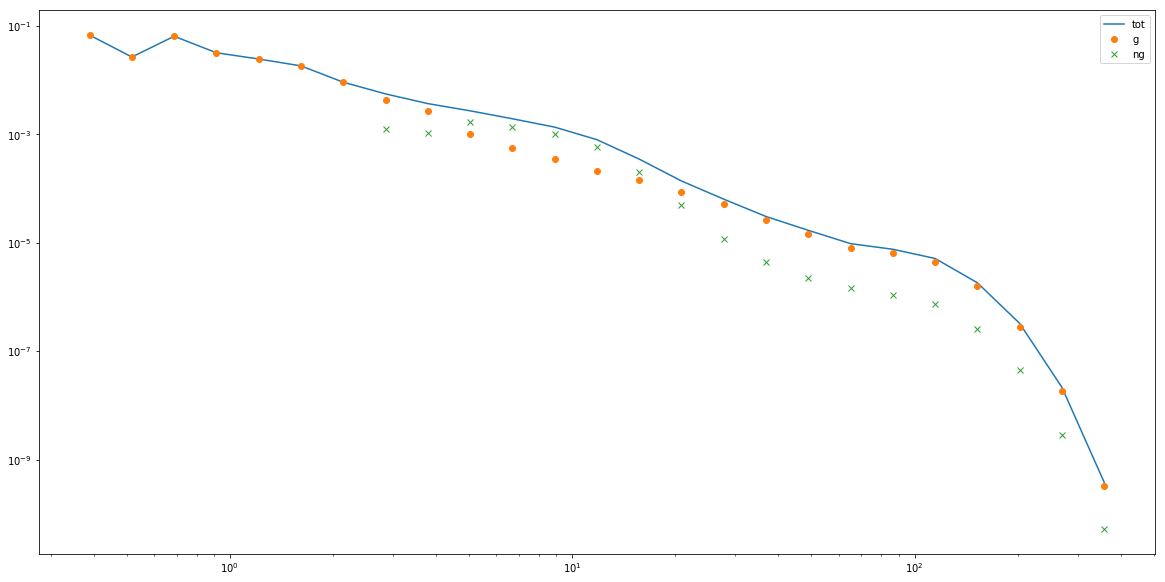

In [45]:
figure(figsize=(20,10))
t = np.load("/user/workdir/soldanof/data/w43_7_12_iso_cnts/s1at.npy")
g = np.load("/user/workdir/soldanof/data/w43_7_12_iso_cnts/s1ag.npy")
ng = np.load("/user/workdir/soldanof/data/w43_7_12_iso_cnts/s1ang.npy")
wk = np.load("/user/workdir/soldanof/data/w43_7_12_iso_cnts/wave_k.npy")
plt.plot(wk, t[23],label="tot")
plt.plot(wk, g[23],"o",label="g")
plt.plot(wk, ng[23],"x",label="ng")
plt.xscale("log")
plt.yscale("log")
plt.legend()

***
## Sauvgarde all coherent scale

In [ ]:
HDU = fits.open("/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_7M12M_n2hp.image-isolated-contsub-crop_cut.fits")
cube = HDU[0].data
header = HDU[0].header
reso = header ['CDELT2']*60
M = nb_scale((48, 1024,1400))
N = header['NAXIS3']

coherent_tot = []
g_tot = []

for i in range(N) :
    q = []
    q= [2.0]*nb_scale((48, 1024,1400))
    print("data number",i)
    wt, S11a, wave_k, S1a, q =  fan_trans(cube[i,:,:], reso=reso, angular=False,q=q,apodize = 0.98, arrdim = np.array([1024,1400]))

    coherent = wt[M:2*M,:,:]
    #Gaussian = wt[2*M:3*M,:,:] 
    
    coherent_tot.append( coherent )
    #g_tot.append( Gaussian )

np.save("/user/workdir/soldanof/data/w43_7_12_iso_cnts/cohScale.npy", coherent_tot )

data number 0
1400 1024


  0%|          | 0/25 [00:00<?, ?it/s]

data number 1
1400 1024


  0%|          | 0/25 [00:00<?, ?it/s]

data number 2
1400 1024


  4%|▍         | 1/25 [00:04<01:52,  4.69s/it]